In [1]:
import cv2

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

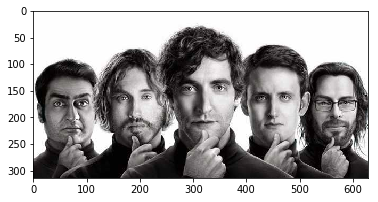

In [4]:
image = cv2.imread('CV_projects/FaceEyeDetection/images/svalley.jpg')
plt.imshow(image)

In [5]:
# HAAR Cascade files
cascade_face = 'CV_projects/FaceEyeDetection/cascades/haarcascade_frontalface_default.xml'
cascade_eye = 'CV_projects/FaceEyeDetection/cascades/haarcascade_eye.xml'

face_classifier = cv2.CascadeClassifier(cascade_face)
eye_classifier = cv2.CascadeClassifier(cascade_eye)

# Reading images and converting to grayscale
image = cv2.imread('CV_projects/FaceEyeDetection/images/svalley.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detecting faces
faces = face_classifier.detectMultiScale(gray, 1.3, 5)
print (faces)

[[251  86 147 147]
 [392 118 121 121]
 [131 117 123 123]
 [ 12 127 119 119]
 [515 132 103 103]]


In [6]:
type(faces)

numpy.ndarray

In [7]:
faces.shape

(5, 4)

In [8]:
def detectFaces(image):
    # HAAR Cascade files
    cascade_face = 'CV_projects/FaceEyeDetection/cascades/haarcascade_frontalface_default.xml'
    cascade_eye = 'CV_projects/FaceEyeDetection/cascades/haarcascade_eye.xml'

    face_classifier = cv2.CascadeClassifier(cascade_face)
    eye_classifier = cv2.CascadeClassifier(cascade_eye)

    # Reading images and converting to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detecting faces
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces.any():
        for (x, y, w, h) in faces:
            print (len(faces))
            cv2.rectangle(image, (x, y), (x+w, y+h), (127,0,0), 3)
            plt.imshow(image)
            plt.show()
    return faces

5


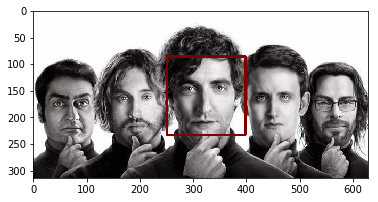

5


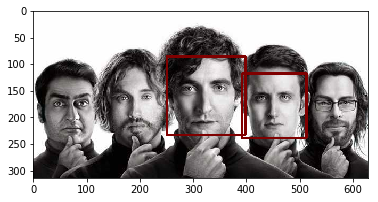

5


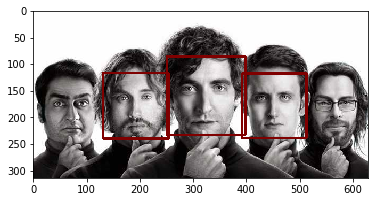

5


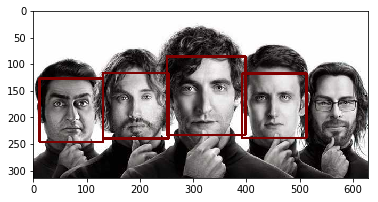

5


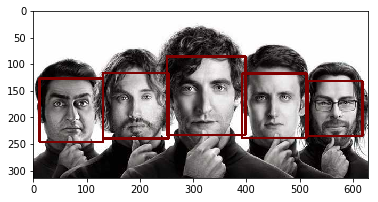

In [10]:
face = detectFaces(image)

1


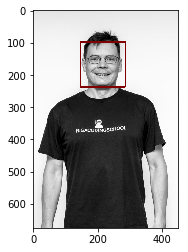

In [12]:
valdis = cv2.imread('Valdis.jpg')
face = detectFaces(valdis)

In [17]:
def cutFace(img, faces, fname="face"):
    if faces.any():
        for i,(x, y, w, h) in enumerate(faces):
            plt.imshow(img[y:y+h,x:x+w])
            plt.show()
            # here we could save the image
            cv2.imwrite(f'{fname}{i}.png', img[y:y+h,x:x+w])

In [14]:
face


array([[147,  98, 139, 139]], dtype=int32)

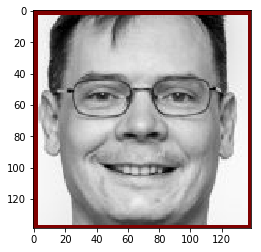

In [18]:
cutFace(valdis, face)

5


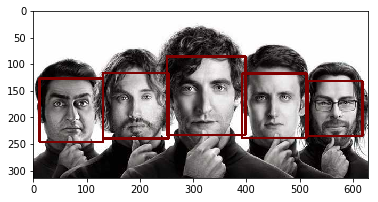

5


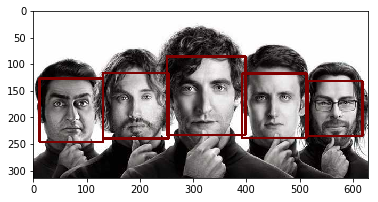

5


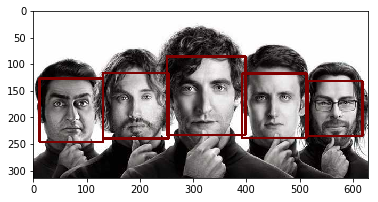

5


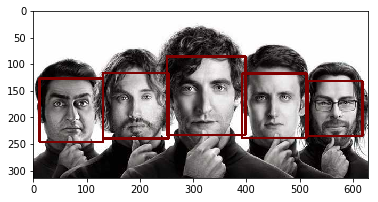

5


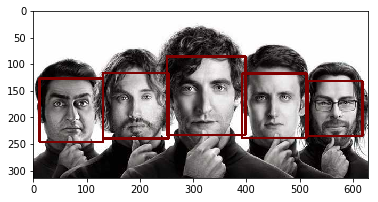

In [19]:
if faces.any():
    for (x, y, w, h) in faces:
        print (len(faces))
        cv2.rectangle(image, (x, y), (x+w, y+h), (127,0,0), 3)
        plt.imshow(image)
        plt.show()

5
[[81 42 35 35]
 [24 42 36 36]]
2
5
[[61 27 34 34]
 [22 34 26 26]]
2
5
[[66 31 28 28]
 [23 33 28 28]
 [34 34 26 26]]
3
5
[[17 30 35 35]
 [60 29 36 36]]
2
5
()
0


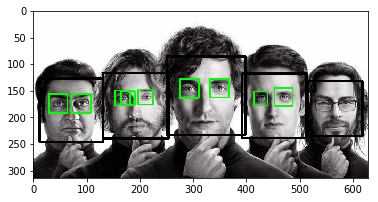

In [21]:
if faces.any():
    for (x, y, w, h) in faces:
        print (len(faces))
        cv2.rectangle(image, (x, y), (x+w, y+h), (0,0,0), 3)

        # Cropping the face found
        area_gray = gray[y:y+h, x:x+w]
        area_original = image[y:y+h, x:x+w]

        # Detecting eyes
        eyes = eye_classifier.detectMultiScale(area_gray)
        print (eyes)
        print (len(eyes))
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(area_original, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    # showing images
    plt.imshow(image)
    plt.show()
elif faces is ():
	print ("No Faces Found")

In [ ]:
# Try detecting faces and eyes in your own photos !

In [22]:
# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


In [24]:
# detect people in the image
# returns the bounding boxes for the detected objects
boxes, weights = hog.detectMultiScale(valdis, winStride=(8,8) )
boxes, weights

((), ())

In [26]:
boxes, weights = hog.detectMultiScale(gray, winStride=(8,8) )
boxes, weights

((), ())

In [35]:
def getPeople(imgName):
    image = cv2.imread(imgName)

    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    people, weights = hog.detectMultiScale(image, winStride=(8,8) )

    for (x, y, w, h) in people:
        print (len(people))
        cv2.rectangle(image, (x, y), (x+w, y+h), (0,127,0), 3)
    plt.imshow(image)
    return people

1


array([[107, 544, 184, 368]], dtype=int32)

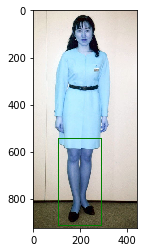

In [36]:
p = getPeople('Uniform.jpg')
p